In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
cancer_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Praktikum 8 | Naive Bayes/data/data (1).csv')

In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'], axis=1)

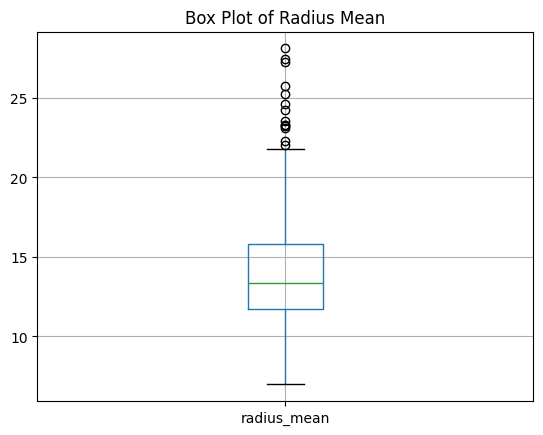

In [8]:
cancer_data.boxplot(column=['radius_mean'])
plt.title("Box Plot of Radius Mean")
plt.show()

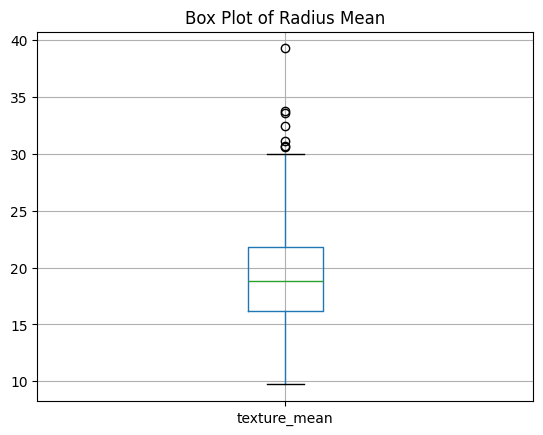

In [9]:
cancer_data.boxplot(column=['texture_mean'])
plt.title("Box Plot of Radius Mean")
plt.show()

In [10]:
cancer_data['radius_mean'] = cancer_data['radius_mean'].fillna(cancer_data['radius_mean'].median())
cancer_data['texture_mean'] = cancer_data['texture_mean'].fillna(cancer_data['texture_mean'].median())


In [12]:
cancer_data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [14]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
cancer_data['radius_bin'] = pd.qcut(cancer_data['radius_mean'], q=3, labels=['Low','Medium','High'])
cancer_data['texture_bin'] = pd.qcut(cancer_data['texture_mean'], q=3, labels=['Low','Medium','High'])

print(cancer_data['diagnosis'].value_counts())
print(cancer_data['radius_bin'].value_counts())
print(cancer_data['texture_bin'].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64
radius_bin
Low       191
High      190
Medium    188
Name: count, dtype: int64
texture_bin
Low       190
Medium    190
High      189
Name: count, dtype: int64


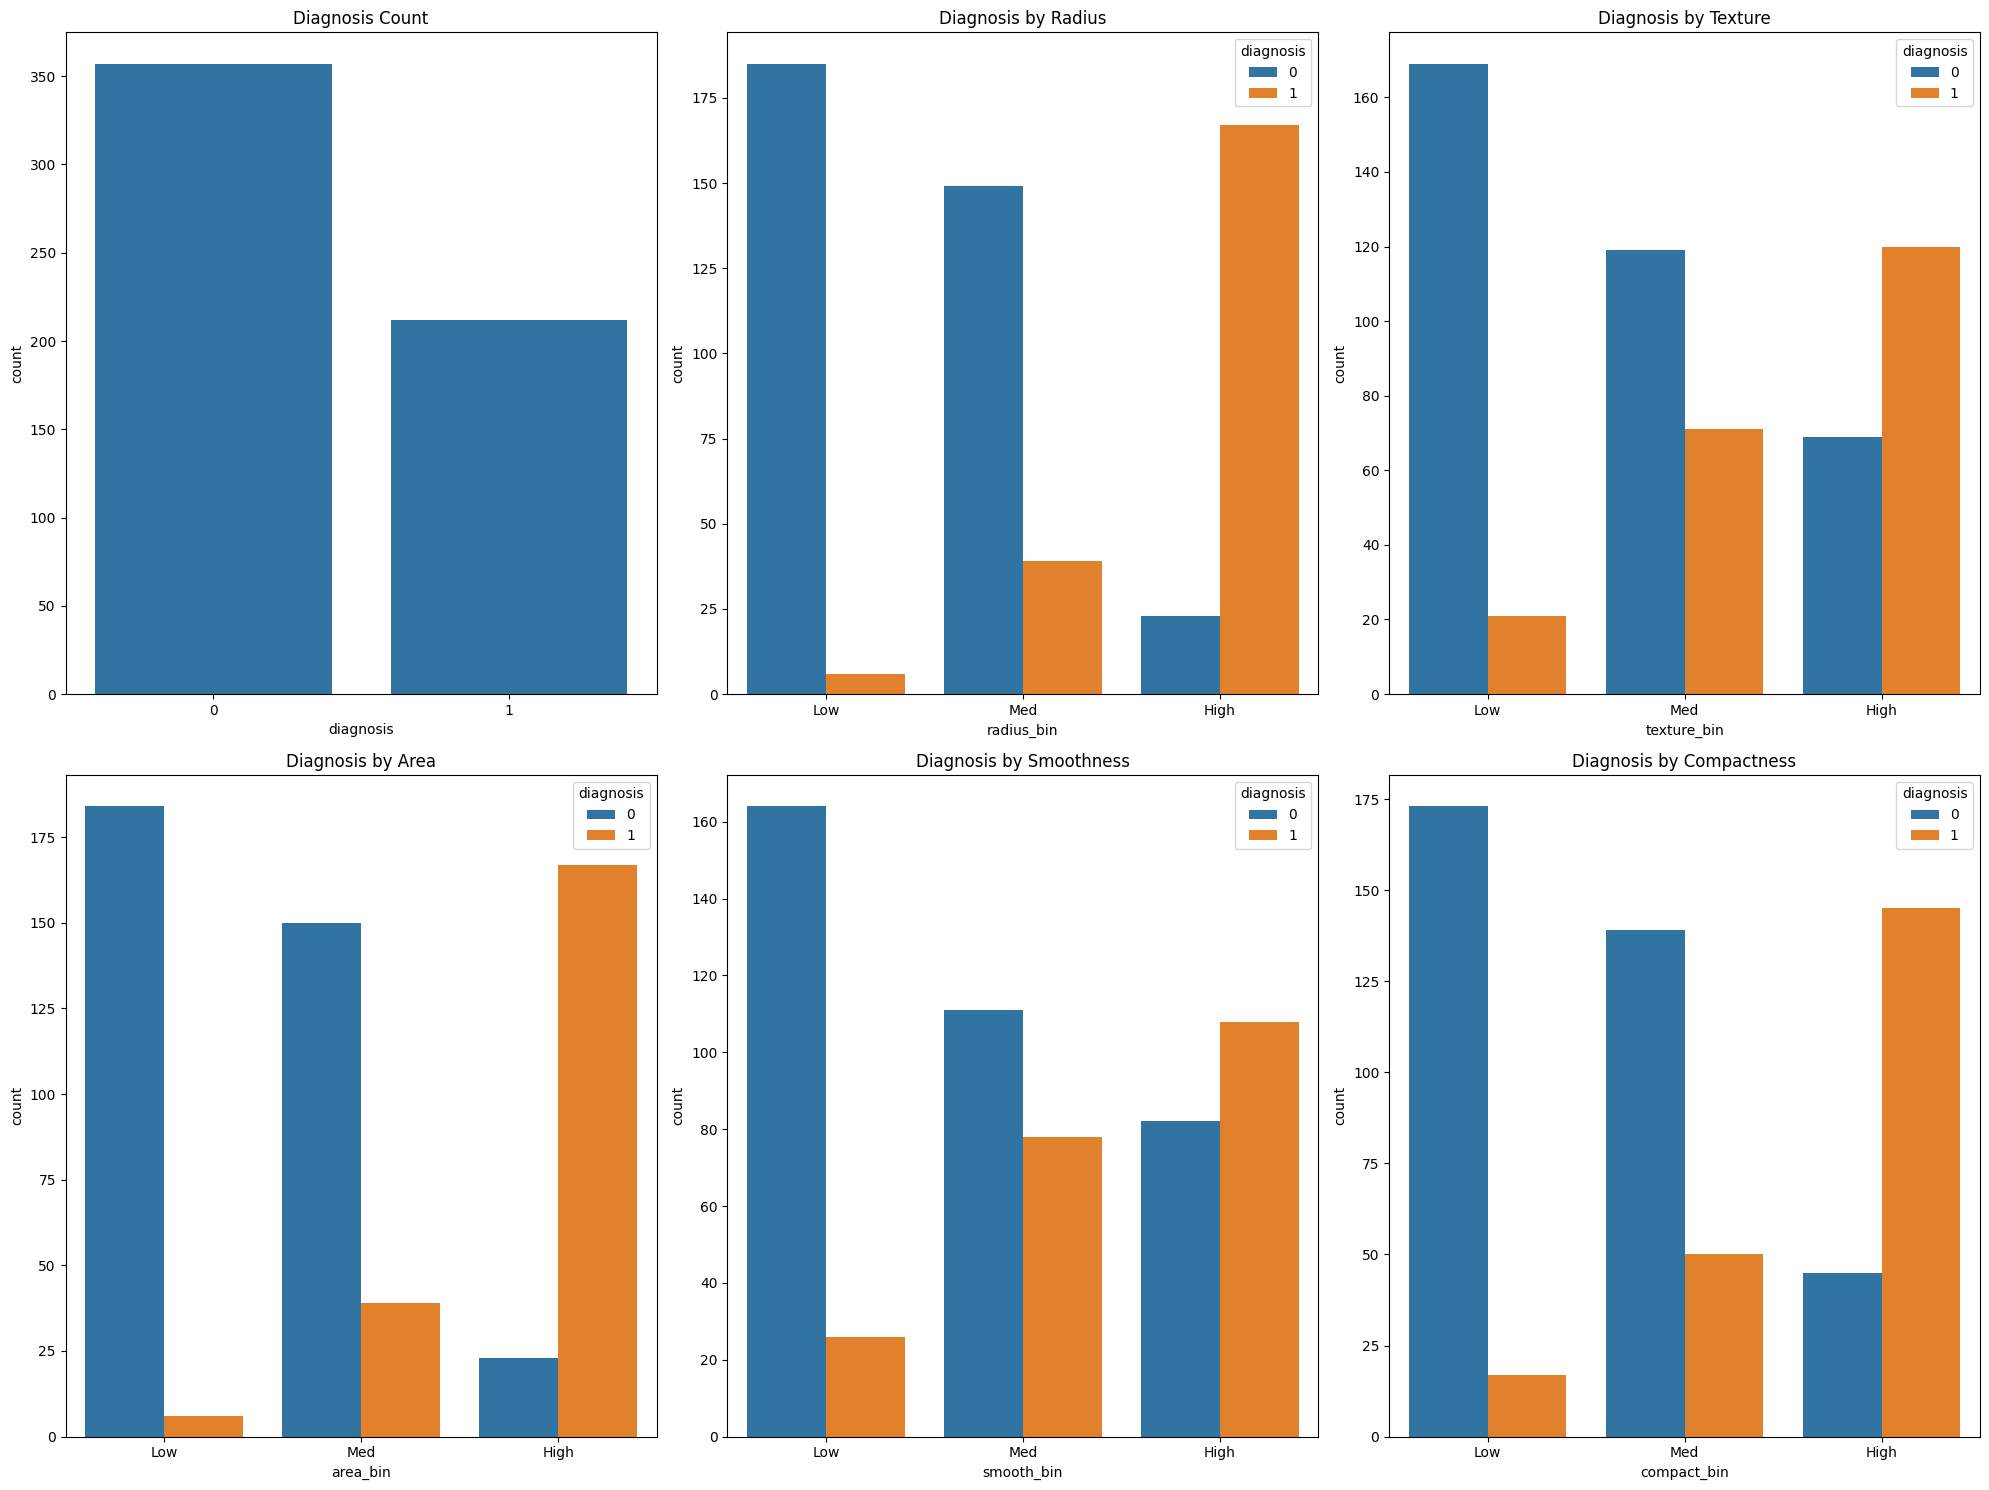

In [31]:
# buat kategori dari fitur numerik
cancer_data['radius_bin'] = pd.qcut(cancer_data['radius_mean'], 3, labels=['Low','Med','High'])
cancer_data['texture_bin'] = pd.qcut(cancer_data['texture_mean'], 3, labels=['Low','Med','High'])
cancer_data['area_bin'] = pd.qcut(cancer_data['area_mean'], 3, labels=['Low','Med','High'])
cancer_data['smooth_bin'] = pd.qcut(cancer_data['smoothness_mean'], 3, labels=['Low','Med','High'])
cancer_data['compact_bin'] = pd.qcut(cancer_data['compactness_mean'], 3, labels=['Low','Med','High'])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()

sns.countplot(x='diagnosis', data=cancer_data, ax=axes[0])
axes[0].set_title('Diagnosis Count')

sns.countplot(x='radius_bin', hue='diagnosis', data=cancer_data, ax=axes[1])
axes[1].set_title('Diagnosis by Radius')

sns.countplot(x='texture_bin', hue='diagnosis', data=cancer_data, ax=axes[2])
axes[2].set_title('Diagnosis by Texture')

sns.countplot(x='area_bin', hue='diagnosis', data=cancer_data, ax=axes[3])
axes[3].set_title('Diagnosis by Area')

sns.countplot(x='smooth_bin', hue='diagnosis', data=cancer_data, ax=axes[4])
axes[4].set_title('Diagnosis by Smoothness')

sns.countplot(x='compact_bin', hue='diagnosis', data=cancer_data, ax=axes[5])
axes[5].set_title('Diagnosis by Compactness')

plt.tight_layout()
plt.show()


In [36]:
cancer_data = cancer_data.drop(columns=[
    'radius_bin',
    'texture_bin',
    'area_bin',
    'smooth_bin',
    'compact_bin'
], errors='ignore')

In [37]:
X = cancer_data.drop(columns=['diagnosis'])
Y = cancer_data['diagnosis']


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42)


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [43]:
train_pred = nb_model.predict(X_train_scaled)
test_pred = nb_model.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(Y_train, train_pred))
print("Test Accuracy:", accuracy_score(Y_test, test_pred))


Train Accuracy: 0.945054945054945
Test Accuracy: 0.9210526315789473


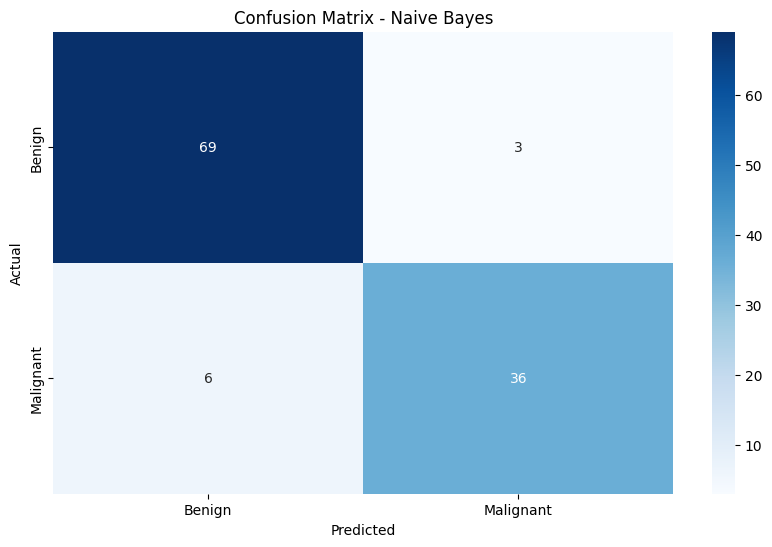

In [44]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(Y_test, test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [45]:
print(classification_report(Y_test, test_pred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [48]:
cv_scores = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Std Deviation:", cv_scores.std())


Cross Validation Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Accuracy: 0.9385188635305075
Std Deviation: 0.014585994424363306
